In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/Users/danielsoriano/Downloads/ds/DS_Intern_Test/Comfort Votes.csv")
df.head(5)

,Unnamed: 0,isFaculty,isStaff,isStudent,building,buildingKey,room,comfort,quarter,timestamp,activity,clothing
0,0,FALSE,False,True,Giedt Hall,DV-01-001586,1003,Chilly,fall2014,Sat Nov 01 2014 11:50:00 GMT-0700 (PDT),NaN,NaN
1,1,FALSE,False,True,Tercero Community,DV-01-000536,410a,Warm,fall2014,Sat Nov 01 2014 12:15:00 GMT-0700 (PDT),NaN,NaN
2,2,FALSE,False,False,Regan Main,DV-01-000348,"Paloma building,210A",Cold,fall2014,Sat Nov 01 2014 14:04:00 GMT-0700 (PDT),NaN,NaN
3,3,FALSE,False,True,Segundo Miller,DV-01-001564,420,Cold,fall2014,Sat Nov 01 2014 14:44:00 GMT-0700 (PDT),NaN,NaN
4,4,FALSE,False,True,Memorial Union,DV-01-000152,Market Place,Perfect,fall2014,Sat Nov 01 2014 16:38:00 GMT-0700 (PDT),NaN,NaN


In [4]:
print(df.shape)
print(df.info())
print(df.describe())

(26186, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26186 entries, 0 to 26185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   26186 non-null  int64 
 1   isFaculty    26186 non-null  object
 2   isStaff      26186 non-null  bool  
 3   isStudent    26186 non-null  bool  
 4   building     22405 non-null  object
 5   buildingKey  22199 non-null  object
 6   room         20724 non-null  object
 7   comfort      22150 non-null  object
 8   quarter      26184 non-null  object
 9   timestamp    26186 non-null  object
 10  activity     7414 non-null   object
 11  clothing     5312 non-null   object
dtypes: bool(2), int64(1), object(9)
memory usage: 2.0+ MB
None
         Unnamed: 0
count  26186.000000
mean   13092.500000
std     7559.391411
min        0.000000
25%     6546.250000
50%    13092.500000
75%    19638.750000
max    26185.000000


In [5]:
print(df.isnull().sum())
#df['comfort'] = df['comfort'].dropna(inplace=False)
df.dropna(subset=['comfort'], inplace=True)
df = df.drop(['isStaff', 'isStudent'], axis=1, inplace = False)

# Convert data types
#df['comfort'] = df1['comfort'].astype('category')


Unnamed: 0         0
isFaculty          0
isStaff            0
isStudent          0
building        3781
buildingKey     3987
room            5462
comfort         4036
quarter            2
timestamp          0
activity       18772
clothing       20874
dtype: int64


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(df.isnull().sum())
df.shape

Unnamed: 0         0
isFaculty          0
building         105
buildingKey      296
room            1772
comfort            0
quarter            0
timestamp          0
activity       14736
clothing       16841
dtype: int64


(22150, 10)

In [8]:
df['comfort'] = df['comfort'].apply(lambda x: 'Hot' if x.lower() in ['hot', 'HOT'] else x)

df['comfort'] = df['comfort'].apply(lambda x: 'Warm' if x.lower() in ['warm', 'WARM'] else x)

df['comfort'] = df['comfort'].apply(lambda x: 'Perfect' if x.lower() in ['perfect', 'PERFECT'] else x)

df['comfort'] = df['comfort'].apply(lambda x: 'Chilly' if x.lower() in ['chilly', 'CHILLY'] else x)

df['comfort'] = df['comfort'].apply(lambda x: 'Cold' if x.lower() in ['cold', 'COLD'] else x)

valid_votes = ['Hot', 'Warm', 'Perfect', 'Chilly', 'Cold']
df = df[df['comfort'].isin(valid_votes)]


In [9]:
top_buildings = df['building'].value_counts().nlargest(3)
print(top_buildings)


Wellman Hall       1847
Young Hall         1217
Shields Library    1122
Name: building, dtype: int64


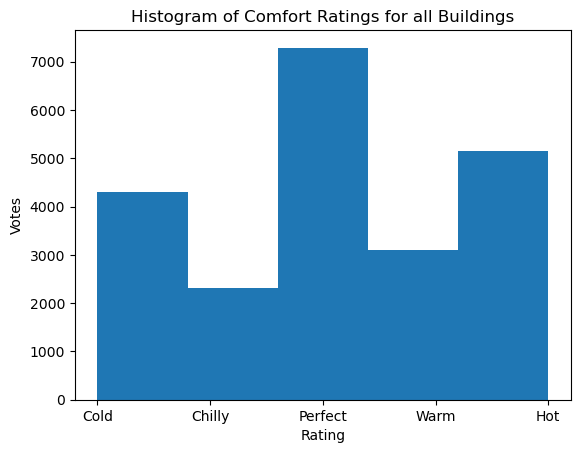

In [10]:

plt.hist(df['comfort'], bins = 5)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Histogram of Comfort Ratings for all Buildings')
plt.xticks(range(5),['Cold', 'Chilly', 'Perfect', 'Warm', 'Hot'])
plt.show()

In [287]:
for building in top_buildings.index:
    print(f"{building}:")
    building_rows = df[df['building'] == building]
    vote_counts = building_rows['comfort'].value_counts()
    print(vote_counts)



Wellman Hall:
Cold       610
Hot        467
Chilly     358
Perfect    213
Warm       199
Name: comfort, dtype: int64
Young Hall:
Cold       638
Hot        280
Chilly     203
Warm        58
Perfect     38
Name: comfort, dtype: int64
Shields Library:
Cold       388
Chilly     351
Perfect    212
Hot         99
Warm        72
Name: comfort, dtype: int64


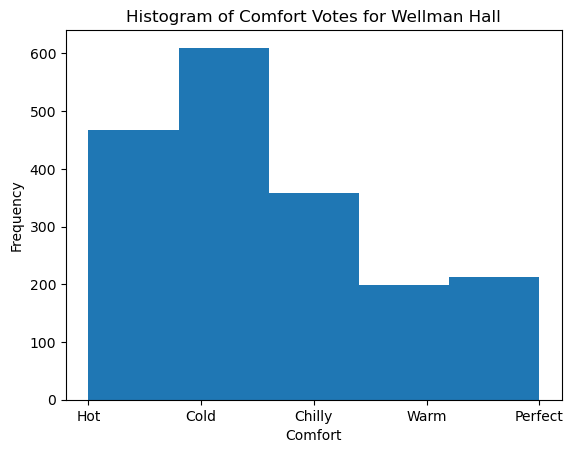

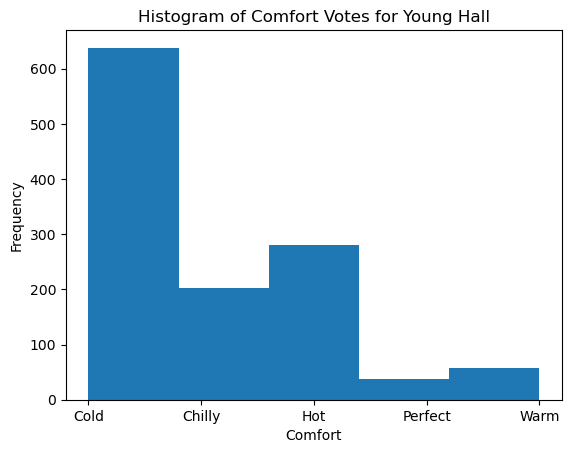

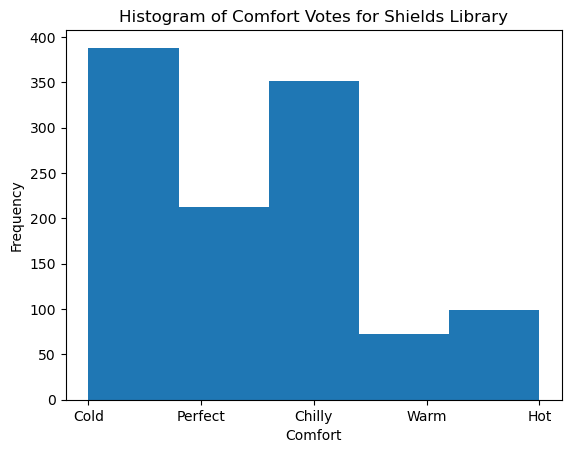

In [283]:
for building in top_buildings.index:
    building_rows = df[df['building'] == building]
    plt.hist(building_rows['comfort'], bins=5)
    plt.xlabel('Comfort')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Comfort Votes for {building}')
    plt.xticks(range(5),['Cold', 'Chilly', 'Perfect', 'Warm', 'Hot'])
    plt.show()
              

In [289]:
df['timestamp'].tail(5)

26180    Mon Oct 15 2018 09:07:24 GMT-0700 (PDT)
26182    Mon Oct 15 2018 09:33:15 GMT-0700 (PDT)
26183    Mon Oct 15 2018 09:34:11 GMT-0700 (PDT)
26184    Mon Oct 15 2018 09:43:22 GMT-0700 (PDT)
26185    Mon Oct 15 2018 09:57:48 GMT-0700 (PDT)
Name: timestamp, dtype: object

In [295]:
df['month'] = pd.DatetimeIndex(df['timestamp']).month

TypeError: [datetime.datetime(2014, 11, 1, 11, 50, tzinfo=tzlocal())
 datetime.datetime(2014, 11, 1, 12, 15, tzinfo=tzlocal())
 datetime.datetime(2014, 11, 1, 14, 4, tzinfo=tzlocal()) ...
 datetime.datetime(2018, 10, 15, 9, 34, 11, tzinfo=tzlocal())
 datetime.datetime(2018, 10, 15, 9, 43, 22, tzinfo=tzlocal())
 datetime.datetime(2018, 10, 15, 9, 57, 48, tzinfo=tzlocal())]

In [18]:
print(df.shape)
print(df.head())
df.timestamp

(22146, 10)
   Unnamed: 0 isFaculty           building   buildingKey  \
0           0     FALSE         Giedt Hall  DV-01-001586   
1           1     FALSE  Tercero Community  DV-01-000536   
2           2     FALSE         Regan Main  DV-01-000348   
3           3     FALSE     Segundo Miller  DV-01-001564   
4           4     FALSE     Memorial Union  DV-01-000152   

                   room  comfort   quarter  \
0                  1003   Chilly  fall2014   
1                  410a     Warm  fall2014   
2  Paloma building,210A     Cold  fall2014   
3                   420     Cold  fall2014   
4          Market Place  Perfect  fall2014   

                                 timestamp activity clothing  
0  Sat Nov 01 2014 11:50:00 GMT-0700 (PDT)      NaN      NaN  
1  Sat Nov 01 2014 12:15:00 GMT-0700 (PDT)      NaN      NaN  
2  Sat Nov 01 2014 14:04:00 GMT-0700 (PDT)      NaN      NaN  
3  Sat Nov 01 2014 14:44:00 GMT-0700 (PDT)      NaN      NaN  
4  Sat Nov 01 2014 16:38:00 GMT-070

0        Sat Nov 01 2014 11:50:00 GMT-0700 (PDT)
1        Sat Nov 01 2014 12:15:00 GMT-0700 (PDT)
2        Sat Nov 01 2014 14:04:00 GMT-0700 (PDT)
3        Sat Nov 01 2014 14:44:00 GMT-0700 (PDT)
4        Sat Nov 01 2014 16:38:00 GMT-0700 (PDT)
                          ...                   
26180    Mon Oct 15 2018 09:07:24 GMT-0700 (PDT)
26182    Mon Oct 15 2018 09:33:15 GMT-0700 (PDT)
26183    Mon Oct 15 2018 09:34:11 GMT-0700 (PDT)
26184    Mon Oct 15 2018 09:43:22 GMT-0700 (PDT)
26185    Mon Oct 15 2018 09:57:48 GMT-0700 (PDT)
Name: timestamp, Length: 22146, dtype: object

In [22]:
date = pd.to_datetime(df.timestamp)

In [25]:
date.strftime("%m")

AttributeError: 'Series' object has no attribute 'strftime'